In [1]:
import sys; sys.path.insert(0, '..')
from dot_plots import *
import Merge_Cartesian as MC

%matplotlib widget

In [2]:
TL= '7'
TC= '6'
layers = 10

(Numbers, 
Major_Grid_x, Major_Grid_y,
Minor_Grid_x, Minor_Grid_y,
Sending_Grid_x, Sending_Grid_y,
Recieivng_Grid_x, Recieivng_Grid_y,
Line_Grid_px, Line_Grid_py,
Letters) = calcualte_numbers_and_grids_and_lines(TL,TC,layers)
float_Numbers = [float(n) for n in Numbers]

In [3]:
ZL = '100'
ZC = '1'

number_periods = 1

Inductor_List =    [ZL   ,TL  ,'1']
Capacitor_List =   [ZC   ,TC  ,'1']
Circuit_List =   ['1'      , number_periods, False, '12']
(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)

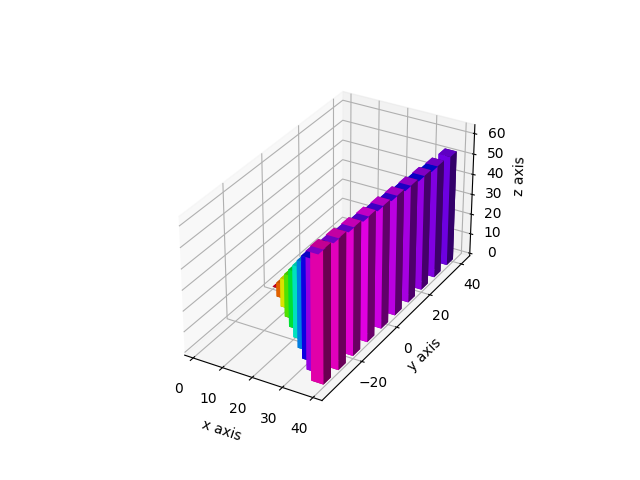

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = Major_Grid_x[:len(Numbers)]#[1,2,3,4,5,6,7,8,9,10]
y3 = Major_Grid_y[:len(Numbers)]#[5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(len(Numbers))

dx = np.ones(len(Numbers))*4
dy = np.ones(len(Numbers))*4
dz = float_Numbers

ax1.set_box_aspect((np.ptp([0,1]), np.ptp([0,2]), np.ptp([0,1])))

bar_val_min = 0
bar_val_max = max(Numbers)

cmap = cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=bar_val_max)
ax1.bar3d(x3, y3, z3, dx, dy, dz , color=cmap(norm(float_Numbers)))


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

In [8]:
VC = data_output_ordered.Voltage_Interconnect_Capacitor

In [9]:
is_Inductive =True
Time_Enquriey = Decimal('0.01')

pos_all, value_lv, value_rv, value_lc, value_rc = MC.get_spatial_zip(Time_Enquriey, data_output_merged,data_output_ordered,is_Inductive)
zip_out = zip(pos_all, value_lv, value_rv, value_lc, value_rc)

In [ ]:
for (position, left_voltage, right_voltage, left_current, right_current) in zip_out:
        x = position
        
        y1_voltage = left_voltage
        y2_voltage = right_voltage
        
        y1_current = left_current
        y2_current = right_current
        
        ax["A"].plot([x_old,x], [y_voltage_old,y1_voltage],'k-')
        ax["A"].plot([x,x] ,   [y1_voltage,y2_voltage])
        
        ax["C"].plot([x_old,x], [y_current_old,y1_current],'k-')
        ax["C"].plot([x,x],    [y1_current,y2_current])
        
        x_old = x
        
        y_voltage_old = y2_voltage
        y_current_old = y2_current